In [206]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
lemm = WordNetLemmatizer()
import numpy as np
from collections import Counter
lines=100000

In [207]:
data = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\obj.pkl")
data3 = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\auto1.pkl")
data2 = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\essay.pkl")

In [208]:
data

,essay_id,essay_set,essay,avg_trait_and_domain,vocab_count,word_count,n_count,v_count,adj_count,adv_count,sent_len,freek,beaut,corr_spell
0,1,1,"Dear local newspaper, I think effects computer...",0.111111,0.270777,0.319468,0.227642,0.260000,0.24,0.150685,0.157895,0.231481,0.213235,0.897333
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.125000,0.340483,0.384359,0.317073,0.406667,0.21,0.205479,0.200000,0.333333,0.323529,0.875117
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.097222,0.241287,0.258735,0.230352,0.220000,0.21,0.082192,0.136842,0.314815,0.213235,0.956589
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",0.138889,0.447721,0.506656,0.555556,0.420000,0.46,0.191781,0.273684,0.370370,0.500000,0.825000
4,5,1,"Dear @LOCATION1, I know having computers has a...",0.111111,0.345845,0.428453,0.311653,0.333333,0.23,0.287671,0.305263,0.370370,0.360294,0.825806
5,6,1,"Dear @LOCATION1, I think that computers have a...",0.111111,0.217158,0.225458,0.159892,0.193333,0.21,0.150685,0.147368,0.138889,0.161765,0.872727
6,7,1,Did you know that more and more people these d...,0.138889,0.415550,0.480865,0.371274,0.346667,0.27,0.479452,0.305263,0.370370,0.316176,0.920648
7,8,1,@PERCENT1 of people agree that computers make ...,0.138889,0.361930,0.460899,0.317073,0.480000,0.49,0.287671,0.400000,0.324074,0.367647,0.949776
8,9,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",0.125000,0.415550,0.424293,0.311653,0.306667,0.34,0.342466,0.357895,0.185185,0.294118,0.921127
9,10,1,In the @LOCATION1 we have the technology of a ...,0.125000,0.369973,0.465058,0.319783,0.393333,0.34,0.369863,0.263158,0.324074,0.220588,0.929032


In [209]:
data3.head()

,essay_id,essay_set,essay,avg_trait_and_domain
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0


In [210]:
del data["essay_id"]

In [211]:
data3.head()

,essay_id,essay_set,essay,avg_trait_and_domain
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0


In [212]:
ls=[]
def standard(m,s,i):
    a=((data3[data3['essay_set'] == i])['avg_trait_and_domain'])
    for i in a:
        ls.append((i-s)/(m-s))
    
    
    
    

In [213]:
for i in range(1,9):
    m = max((data3[data3['essay_set'] == i])['avg_trait_and_domain'])
    s = min((data3[data3['essay_set'] == i])['avg_trait_and_domain'])
    print(m)
    standard(m,s,i)

12.0
5.0
3.0
3.0
4.0
4.0
10.0
24.0


In [214]:
data3["new_scores"]=ls


In [215]:
del data["avg_trait_and_domain"]

In [216]:
del data["essay"]

In [217]:
data.head()

,essay_set,vocab_count,word_count,n_count,v_count,adj_count,adv_count,sent_len,freek,beaut,corr_spell
0,1,0.270777,0.319468,0.227642,0.260000,0.24,0.150685,0.157895,0.231481,0.213235,0.897333
1,1,0.340483,0.384359,0.317073,0.406667,0.21,0.205479,0.200000,0.333333,0.323529,0.875117
2,1,0.241287,0.258735,0.230352,0.220000,0.21,0.082192,0.136842,0.314815,0.213235,0.956589
3,1,0.447721,0.506656,0.555556,0.420000,0.46,0.191781,0.273684,0.370370,0.500000,0.825000
4,1,0.345845,0.428453,0.311653,0.333333,0.23,0.287671,0.305263,0.370370,0.360294,0.825806


In [218]:
data3.head()

,essay_id,essay_set,essay,avg_trait_and_domain,new_scores
0,1,1,"Dear local newspaper, I think effects computer...",8.0,0.6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,0.7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,0.5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,0.8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,0.6


In [219]:
data=data.drop(data.index[12255:12978])

In [220]:
data3=data3.drop(data3.index[12255:12978])

In [221]:
data3.shape

(12255, 5)

In [228]:
label=data3["avg_trait_and_domain"]

In [229]:
label.fillna(0,inplace=True)

In [230]:
data.head()

,essay_set,vocab_count,word_count,n_count,v_count,adj_count,adv_count,sent_len,freek,beaut,corr_spell
0,1,0.270777,0.319468,0.227642,0.260000,0.24,0.150685,0.157895,0.231481,0.213235,0.897333
1,1,0.340483,0.384359,0.317073,0.406667,0.21,0.205479,0.200000,0.333333,0.323529,0.875117
2,1,0.241287,0.258735,0.230352,0.220000,0.21,0.082192,0.136842,0.314815,0.213235,0.956589
3,1,0.447721,0.506656,0.555556,0.420000,0.46,0.191781,0.273684,0.370370,0.500000,0.825000
4,1,0.345845,0.428453,0.311653,0.333333,0.23,0.287671,0.305263,0.370370,0.360294,0.825806


In [231]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, max_depth=4,
                                 random_state=0)
clf.fit(data,label)
clf.score(data,label)

0.9215867711999461

In [235]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=10)
regr.fit(data, label) 
regr.score(data,label)

0.8994845039606957

In [233]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=20.0).fit(data,label)
linridge.fit(data, label) 
linridge.score(data,label)

0.4948375388446777

## not working :// :(

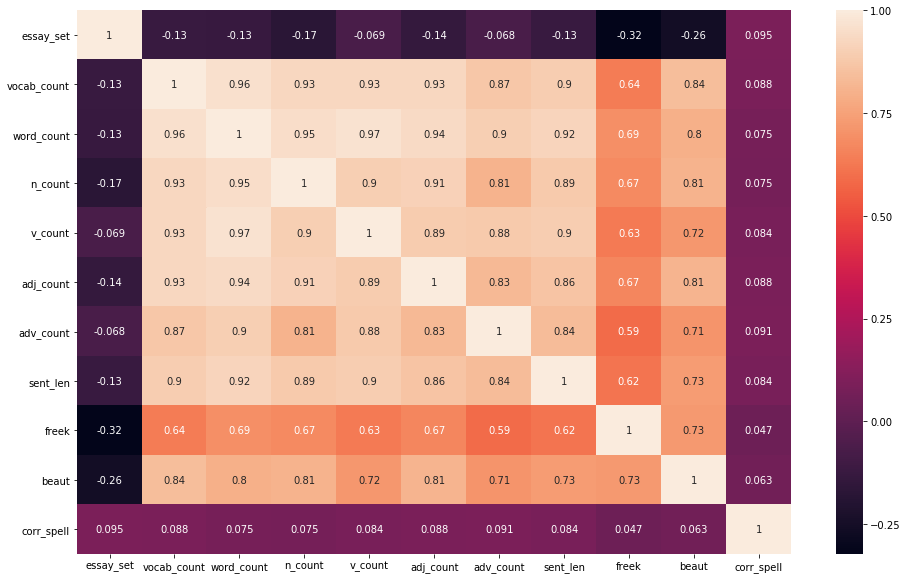

In [510]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


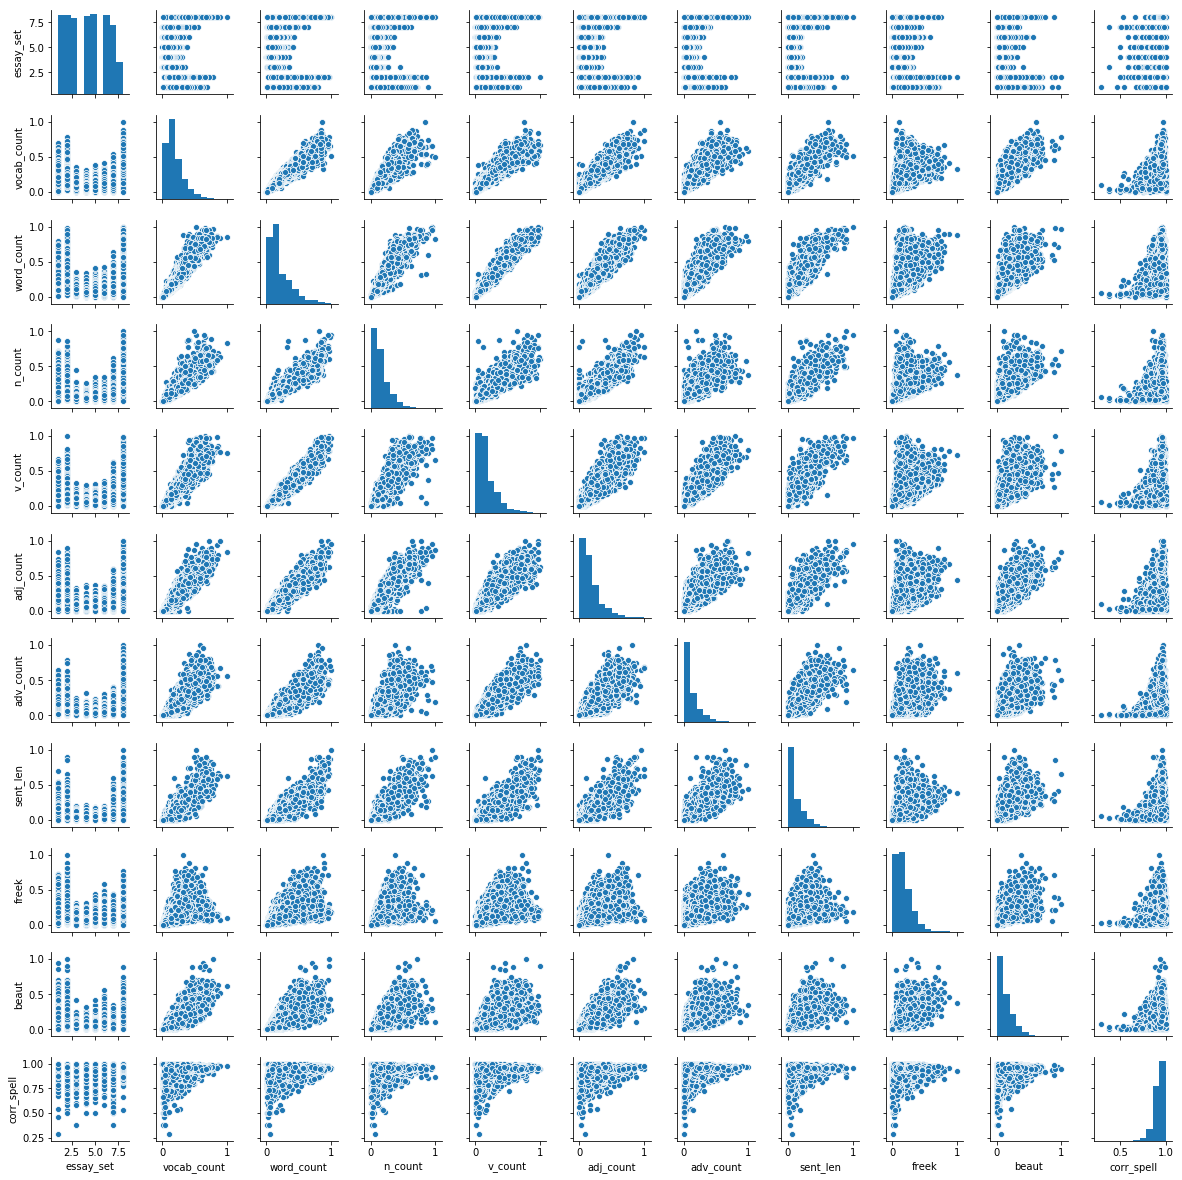

In [511]:
sns.pairplot(data, size=1.5);
plt.show()

In [512]:
from sklearn.metrics import mean_squared_error

In [513]:
mean_squared_error(label,pred)

0.014924234934575337

In [514]:
data["n_count"]=np.log(data["n_count"])

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [515]:
data.isnull().sum()

essay_set      0
vocab_count    0
word_count     0
n_count        0
v_count        0
adj_count      0
adv_count      0
sent_len       0
freek          0
beaut          0
corr_spell     0
dtype: int64

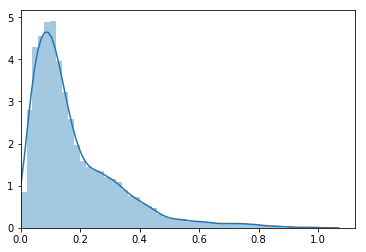

In [516]:
ls=["v_count"]
sns.distplot(data[ls]).set(xlim=(0))
plt.show()

In [56]:
data2["essay"].iloc[1285]

'Personally I think computers have a good influence on people. There one of the greatest inventions.With computers you can listen to music or watch @CAPS1, research things for your projects, or just have a good time. Computers help people create, listen to, watch and make music and @CAPS1. When you have a computer you can get influenced by other musicians to create music. And where does eating that music need to go? Into a computer to add beats and different vocals. You can also watch @CAPS1 on there! Not exactly @CAPS1 but whatever show you\'d like to see. Some people even create movies on special programs. Thats not all though. Alot of questions can be answered on the computer by doing research. Cures for different disease like cancer can be found. Even small research projects like "Who founded @CAPS2" can easily be found with one quick google search. Yeah we might be getting lazy but it makes peoples lives simpler. For instance intead of reading through dozens of books you could jus

In [57]:
data2["essay"].iloc[100]

'Dear Local Newspaper, Have you ever gone somewhere, taken pictures, and posted them on the computer? If you have you will remember where you visited. But atleast you went to @ORGANIZATION1, or @LOCATION1 or somewhere. There are some people who are on the computer all day. Instead of experiencing nature and taken on @CAPS1 life brings to them, they are on facebook or youtube all day. This disgusts me because there are many fun, beautiful, and entertainings things to do. In @CAPS2 opinion I think computers have negative effects on people. People miss out on enjoying nature or interacting with friends and family. Some people do not get exercise anymore and it hurts to see obese people just sit ther and do nothing about there lives. First I\'d like to talk about obesity. Did you know that @PERCENT1 of children are obese at young a young age? Computers take the place of exercising for a young boy or girl. They should go outside and play sports like basketball or soccer. Another thing is th

In [100]:
df= ((data[data['essay_set'] == 3]))
y=((data3[data3['essay_set'] == 3]))["new_scores"]

In [101]:
df["y"]=y

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


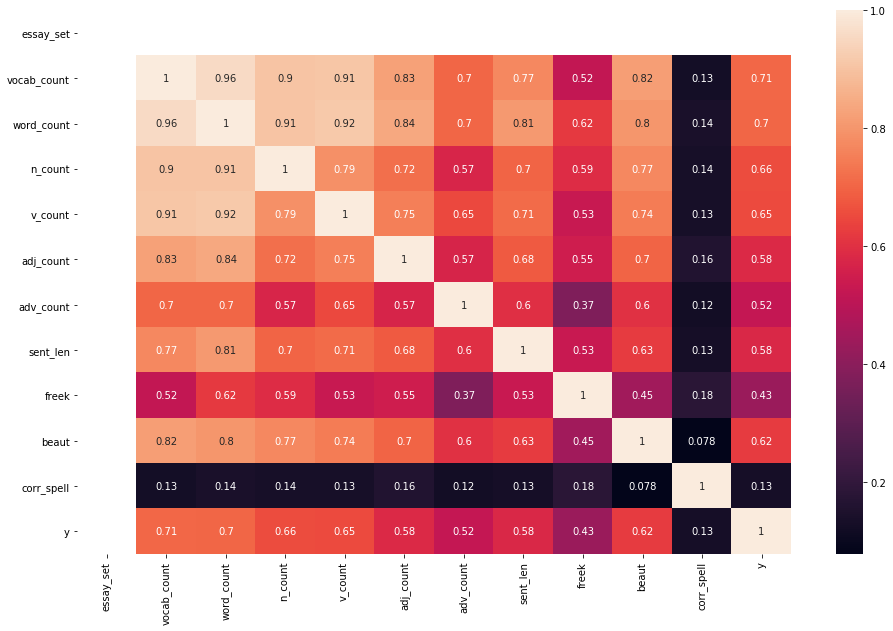

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()